In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
# %matplotlib inline

In [3]:
# foot = cv2.imread('img/football.jpg')
foot = cv2.imread('img/cat.jpg')
gray_foot = cv2.cvtColor(foot, cv2.COLOR_BGR2GRAY)
earth = cv2.imread('img/dog.jpg')
gray_earth = cv2.cvtColor(earth, cv2.COLOR_BGR2GRAY)

In [4]:
assert gray_foot.shape == gray_earth.shape

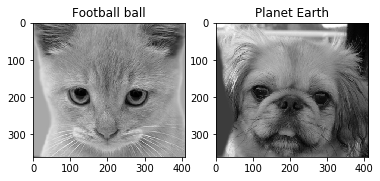

In [5]:
plt.subplot(121)
plt.title('Football ball')
plt.imshow(gray_foot,'gray')
plt.subplot(122)
plt.title('Planet Earth')
plt.imshow(gray_earth,'gray')

In [6]:
def create_pyramid(img, pyramid=[], effect='gaussian',upscale_dim=(256,256)):
    n,m = img.shape
    if effect=='gaussian':
        img_blur = cv2.GaussianBlur(img, (7,7),2)
    else :
        img_blur = cv2.GaussianBlur(img, (7,7),2)
        img_blur = cv2.Laplacian(img_blur,cv2.CV_64F)
    img_downsampled = img_blur[::2,::2]
#     img_upscale = cv2.resize(img_downsampled, upscale_dim, interpolation = cv2.INTER_AREA)
    pyramid.append(img_downsampled)
    if n/2 < 2:
        return pyramid
    else:
        return create_pyramid(img_downsampled, pyramid, effect)
        

In [7]:
pyr_foot_gaus = create_pyramid(gray_foot, pyramid=[gray_foot])
pyr_earth_gaus =create_pyramid(gray_earth, pyramid=[gray_earth])

In [8]:
foot_lap = cv2.GaussianBlur(gray_foot, (7,7),1)
foot_lap = cv2.Laplacian(foot_lap,cv2.CV_64F)
pyr_foot_lap = create_pyramid(gray_foot,pyramid=[foot_lap], effect='laplacian')

In [9]:
earth_lap = cv2.GaussianBlur(gray_earth, (7,7),1)
earth_lap = cv2.Laplacian(earth_lap,cv2.CV_64F)
pyr_earth_lap = create_pyramid(gray_earth,pyramid=[earth_lap], effect='laplacian')

In [10]:
sum= []
# print(len(pyr_earth_gaus))
N = 2
pyr_earth = []
for img in pyr_earth_gaus[:-N] + pyr_earth_lap[-(N+1)::-1]:
    pyr_earth.append(cv2.GaussianBlur(img, (7,7),1))

pyr_foot = []
for img in pyr_foot_gaus[:-N] + pyr_foot_lap[-(N+1)::-1]:
    pyr_earth.append(cv2.GaussianBlur(img, (7,7),1))

pyr = []
for img in pyr_earth_gaus[:-N] + pyr_foot_lap[-(N+1)::-1]:
    pyr.append(cv2.GaussianBlur(img, (7,7),1))
    


0
(361, 410)
(181, 205)
1
(181, 205)
(91, 103)
2
(91, 103)
(46, 52)
3
(46, 52)
(23, 26)
4
(23, 26)
(12, 13)
5
(12, 13)
(6, 7)


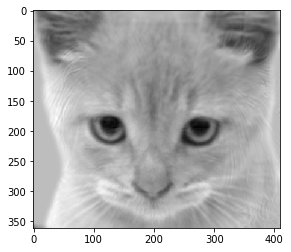

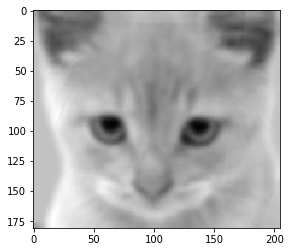

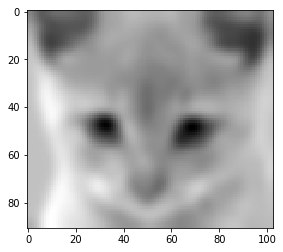

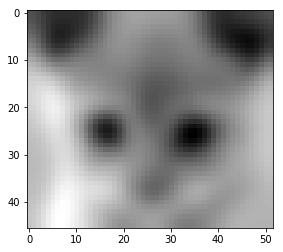

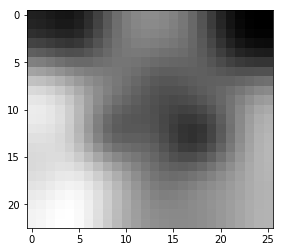

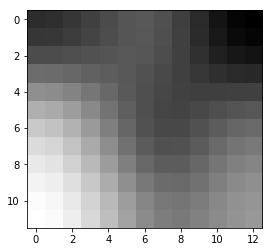

In [11]:
# plt.imshow(cv2.resize(pyr_earth_gaus[4], (256,256), interpolation = cv2.INTER_AREA),'gray')
for i, img in enumerate(pyr_foot_gaus[1:-N]):
    print(i)
    img1 = pyr_earth_lap[i]
    print(img1.shape)
    print(img.shape)
    img_gau = cv2.resize(img, img1.T.shape)#, interpolation = cv2.INTER_AREA)
    img = cv2.GaussianBlur(img_gau + img1, (7,7),1)
    plt.figure()
    plt.imshow(img,'gray')

In [50]:
def hybrid_img(gaus, lap, N, coeff_gaus_resize = 1, coeff_gaus_original = 1, coeff_lap = 1):
    img_gau = gaus[-N]
    for i, img_lap in enumerate(lap[-N-1::-1]):
        img_gau = cv2.resize(img_gau, img_lap.T.shape)
        img1 = gaus[-N-i-1]
        img = img_gau * coeff_gaus_resize + img1*coeff_gaus_original + img_lap * coeff_lap
    plt.figure()
    plt.imshow(img,'gray')
    plt.figure(figsize=(12,12))
    plt.imshow(img,'gray')
    plt.figure(figsize=(1,1))
    plt.imshow(cv2.resize(img, (int(img.shape[1]/10),int(img.shape[0]/10))),'gray')

0.3 0.1 1


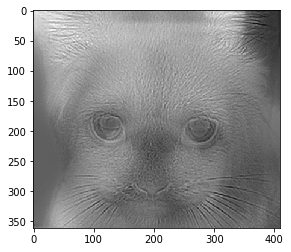

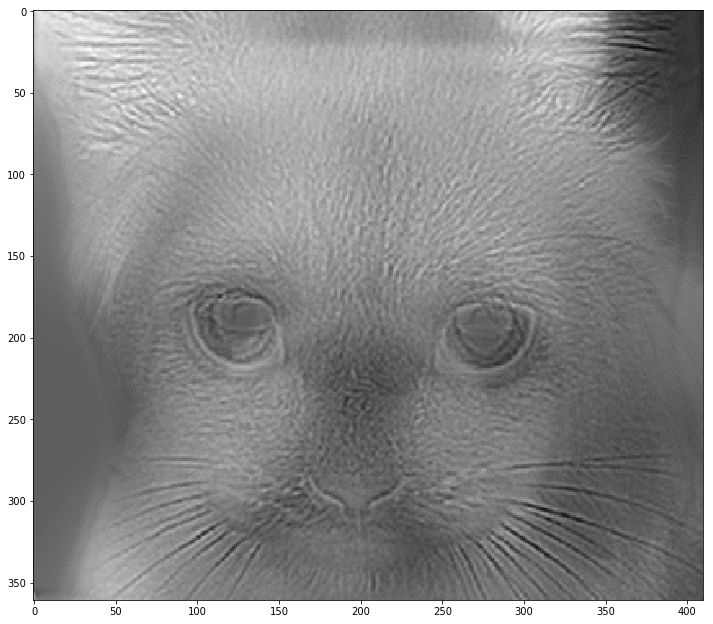

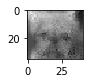

In [51]:
print(0.3,0.1,1)
hybrid_img(pyr_earth_gaus, pyr_foot_lap, 5, 0.3,0.1,1)

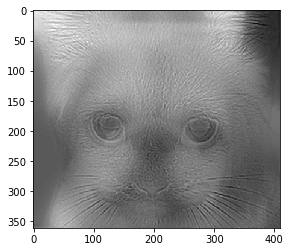

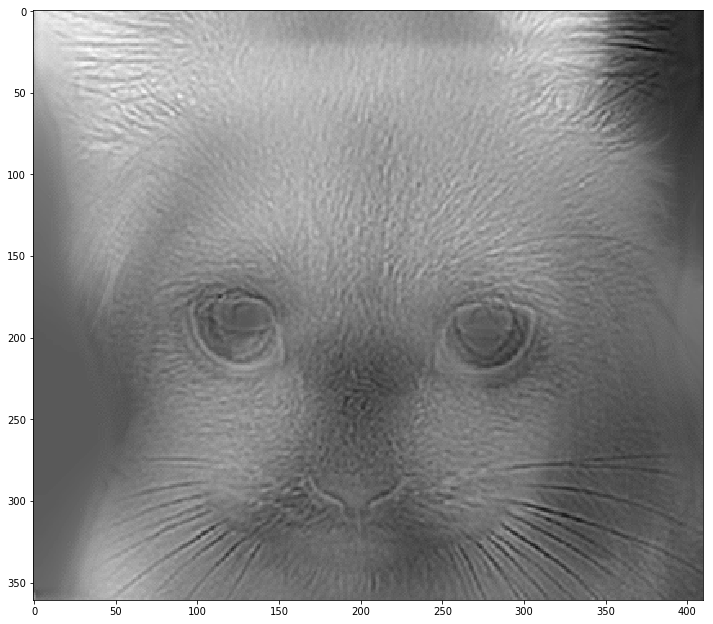

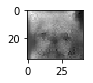

In [52]:
hybrid_img(pyr_earth_gaus, pyr_foot_lap, 5, 0.4,0.1,1)

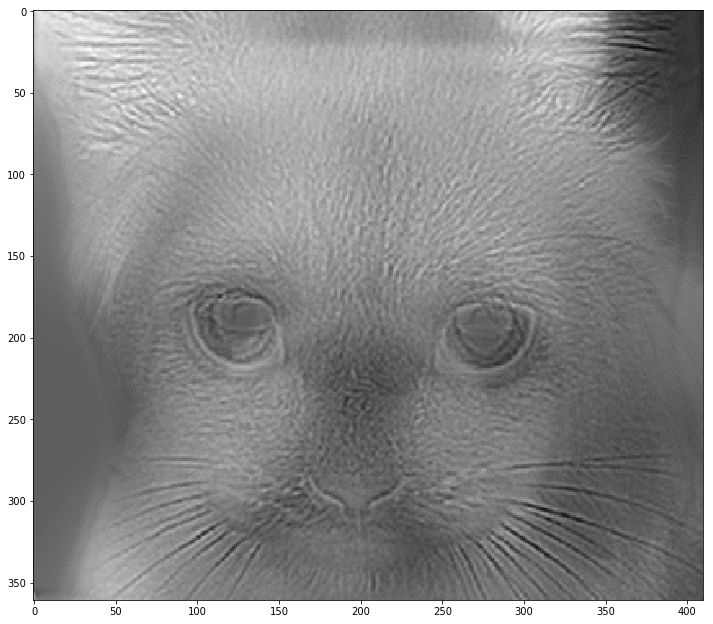

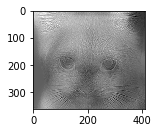

In [19]:
N=5
img_gau = pyr_earth_gaus[-N]
for i, img_lap in enumerate(pyr_foot_lap[-N-1::-1]):
    img_gau = cv2.resize(img_gau, img_lap.T.shape)#, interpolation = cv2.INTER_AREA)
    img1 = pyr_earth_gaus[-N-i-1]
#     img = cv2.GaussianBlur(img_gau * 0.4 + img1*0.05 + img_lap, (7,7),1)
    img = img_gau * 0.3 + img1*0.1 + img_lap
plt.figure(figsize=(12,12))
plt.imshow(img,'gray')
plt.figure(figsize=(2,2))
plt.imshow(img,'gray')

0
(23, 26)
(46, 52)
1
(46, 52)
(91, 103)
2
(91, 103)
(181, 205)
3
(181, 205)
(361, 410)


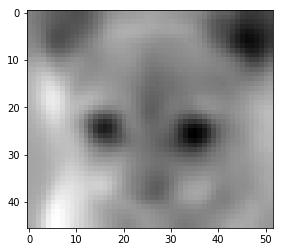

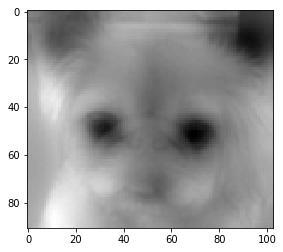

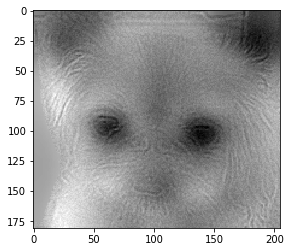

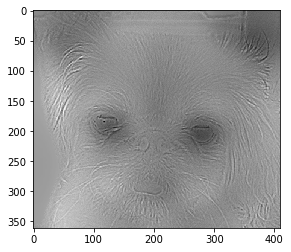

In [13]:
N=5
img_gau = pyr_foot_gaus[-N]
for i, img_lap in enumerate(pyr_earth_lap[-N-1::-1]):
    print(i)
    print(img_gau.shape)
    print(img_lap.shape)
    img_gau = cv2.resize(img_gau, img_lap.T.shape)#, interpolation = cv2.INTER_AREA)
    img1 = pyr_earth_gaus[-N-i-1]
#     img = cv2.GaussianBlur(img_gau * 0.3 + img1*0.05 + img_lap, (7,7),1)
    img = img_gau * 0.3 + img1*0.05 + img_lap
    plt.figure()
    plt.imshow(img,'gray')